Write  a colab  tensorflow only from scratch not using high level api  of the same

In [ ]:
import tensorflow as tf
print(tf.__version__)

2.8.0


generate data

In [ ]:
input_dim = 2
output_dim = 1
learning_rate = 0.01

#weight matrix
w = tf.Variable(tf.random.uniform(shape=(input_dim, output_dim)))
#bias vector
b = tf.Variable(tf.zeros(shape=(output_dim,)))

def compute_predictions(features):
  return tf.matmul(features, w) + b

def compute_loss(labels, predictions):
  return tf.reduce_mean(tf.square(labels - predictions))

def train_on_batch(x, y):
  with tf.GradientTape() as tape:
    predictions = compute_predictions(x)
    loss = compute_loss(y, predictions)
    dloss_dw, dloss_db = tape.gradient(loss, [w, b])
  w.assign_sub(learning_rate * dloss_dw)
  b.assign_sub(learning_rate * dloss_db)
  return loss

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: RuntimeWarning: covariance is not positive-semidefinite.
  if __name__ == '__main__':
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: RuntimeWarning: covariance is not positive-semidefinite.
  # This is added back by InteractiveShellApp.init_path()


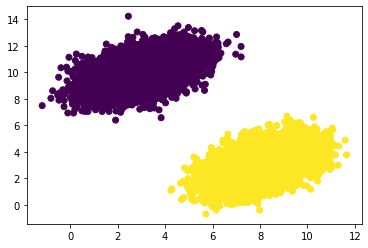

In [ ]:
import numpy as np
import random
import matplotlib.pyplot as plt
%matplotlib inline

#dataset.
num_samples = 10000
negative_samples = np.random.multivariate_normal(
    mean=[3, 10], cov=[[1, 0.2],[0.8, 1]], size=num_samples)
positive_samples = np.random.multivariate_normal(
    mean=[8, 3], cov=[[1, 0.4],[0.6, 1]], size=num_samples)
features = np.vstack((negative_samples, positive_samples)).astype(np.float32)
labels = np.vstack((np.zeros((num_samples, 1), dtype='float32'),
                    np.ones((num_samples, 1), dtype='float32')))

plt.scatter(features[:, 0], features[:, 1], c=labels[:, 0])

In [ ]:
# Shuffle the data.
indices = np.random.permutation(len(features))
features = features[indices]
labels = labels[indices]


dataset = tf.data.Dataset.from_tensor_slices((features, labels))
dataset = dataset.shuffle(buffer_size=1024).batch(256)

for epoch in range(10):
  for step, (x, y) in enumerate(dataset):
    loss = train_on_batch(x, y)
  print('Epoch %d: last batch loss = %.4f' % (epoch, float(loss)))

Epoch 0: last batch loss = 0.0127
Epoch 1: last batch loss = 0.0078
Epoch 2: last batch loss = 0.0130
Epoch 3: last batch loss = 0.0143
Epoch 4: last batch loss = 0.0098
Epoch 5: last batch loss = 0.0077
Epoch 6: last batch loss = 0.0086
Epoch 7: last batch loss = 0.0084
Epoch 8: last batch loss = 0.0057
Epoch 9: last batch loss = 0.0060


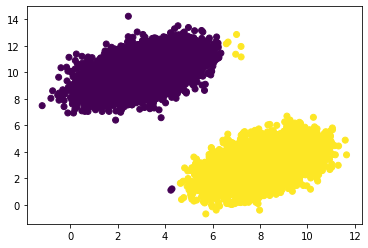

In [ ]:
predictions = compute_predictions(features)
plt.scatter(features[:, 0], features[:, 1], c=predictions[:, 0] > 0.5)